In [1]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

In [2]:
# def padding (img, dimx, dimy):
#     dimx_zeros = dimx - img.shape[1]
#     dimy_zeros = dimy - img.shape[0]
#     dimx_left = int(dimx_zeros/2)
#     dimx_right = dimx_zeros-dimx_left
#     dimy_top = int(dimy_zeros/2)
#     dimy_down = dimy_zeros-dimy_top

#     img_out = np.zeros((dimy, dimx, img.shape[2]))
#     img_out[dimy_top:dimy-dimy_down, dimx_left: dimx-dimx_right] = img

#     return img_out


In [3]:
# def corr2d (img, ker):
#     return np.multiply(img, ker).sum()

# def sigmoid(x):
#     return 1/(1+np.exp(-x))

# def nonlinear_func(img):
#     return sigmoid(img)

In [4]:
# def conv2d (input_img, ker, bias, nonlinear_func, stride=(1,1), pad='same'):
#     img_out = []
#     if pad =='same':
#         dimy = stride[0]*(input_img.shape[0]-1)+ker.shape[0]
#         dimx = stride[1]*(input_img.shape[1]-1)+ker.shape[1]
#         img_padded = padding(input_img, dimx, dimy)
#         img_out = np.zeros((input_img.shape[0], input_img.shape[1]))
#     else:
#         if((input_img.shape[0]-ker.shape[0])%stride[0]==0):
#             dimy = input_img.shape[0]
#         else:
#             dimy = input_img.shape[0]+stride[0]-(input_img.shape[0]-ker.shape[0])%stride[0]
#         if((input_img.shape[1]-ker.shape[1])%stride[1]==0):
#             dimx = input_img.shape[1]
#         else:
#             dimx = input_img.shape[1]+stride[1]-(input_img.shape[1]-ker.shape[1])%stride[1]

#         img_padded = padding(input_img, dimx, dimy)
#         img_out = np.zeros((int((dimy-ker.shape[0])/stride[0])+1, (int((dimx-ker.shape[1])/stride[1])+1)))

#     ker_rev = np.zeros([ker.shape[1], ker.shape[0], ker.shape[2]])

#     for iter in range(ker.shape[0]):
#         for iter2 in range(ker.shape[1]):
#             ker_rev[ker.shape[1]-1-iter2, ker.shape[0]-1-iter] = ker[iter, iter2]

#     ker_rev_y = ker_rev.shape[0]
#     ker_rev_x = ker_rev.shape[1]
#     for iter in range(int((dimy-ker_rev.shape[0])/stride[0]) +1):
#         for iter2 in range(int((dimx-ker_rev.shape[1])/stride[1])+1 ):
#             img_out[iter, iter2] =corr2d(img_padded[iter*stride[0]:iter*stride[0]+ker_rev_y, iter2*stride[1]:iter2*stride[1]+ker_rev_x], ker_rev)

#     print("######################################################################")
#     print("output size from the conv_layer : ", img_out.shape)
#     print("ker size : ", ker.shape)
#     print("stride : ", stride)
#     print("pad : ", pad)
#     return nonlinear_func(img_out+bias)

In [5]:
# def conv_layer(input_img, num_kernels, nonlinear_func, kernels, biases, stride = (1, 1), pad = 'same'):
#     if pad =='same':
#         dimy = stride[0]*(input_img.shape[0]-1)+kernels[0].shape[0]
#         dimx = stride[1]*(input_img.shape[1]-1)+kernels[0].shape[1]
#         img_padded = padding(input_img, dimx, dimy)
#         img_out = np.zeros((input_img.shape[0], input_img.shape[1], num_kernels))
#     else:
#         if((input_img.shape[0]-kernels[0].shape[0])%stride[0]==0):
#             dimy = input_img.shape[0]
#         else:
#             dimy = input_img.shape[0]+stride[0]-(input_img.shape[0]-kernels[0].shape[0])%stride[0]
#         if((input_img.shape[1]-kernels[0].shape[1])%stride[1]==0):
#             dimx = input_img.shape[1]
#         else:
#             dimx = input_img.shape[1]+stride[1]-(input_img.shape[1]-kernels[0].shape[1])%stride[1]
#         img_padded = padding(input_img, dimx, dimy)
#         img_out = np.zeros((int((dimy-kernels[0].shape[0])/stride[0])+1, (int((dimx-kernels[0].shape[1])/stride[1])+1), num_kernels))

#     for iter in range(num_kernels):
#         img_out[:, :, iter] = conv2d(input_img, kernels[iter], biases[iter], nonlinear_func, stride, pad)
#     return img_out

######################################################################
output size from the conv_layer :  (132, 199)
ker size :  (10, 10, 3)
stride :  (5, 5)
pad :  valid
######################################################################
output size from the conv_layer :  (132, 199)
ker size :  (10, 10, 3)
stride :  (5, 5)
pad :  valid
(132, 199, 2)
kernel :  [array([[[ 2.18581114,  0.63113625,  0.71345829],
        [ 1.32894625, -0.07194044,  0.4616755 ],
        [-2.42660015, -0.10824194,  0.02938687],
        [-0.51771901,  0.07804287, -0.23623779],
        [ 0.34006251, -0.47013287,  0.09267389],
        [ 0.3113312 ,  1.29302968,  0.76515561],
        [ 0.06970091,  0.77165044,  0.51856312],
        [-0.63388318,  1.34446949, -0.21052185],
        [ 0.70140429, -1.76404666,  0.32010029],
        [-1.48355437,  0.76355288, -1.30066691]],

       [[-0.05430136,  1.87780671, -1.6430794 ],
        [-0.52752397,  0.83694007, -1.17379937],
        [ 0.84080158,  1.61307696,  0.95804

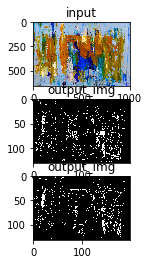

In [11]:
# img = cv2.imread('image.png')
# ker1 = np.random.normal(size = (10, 10, 3))
# ker12 = np.random.normal(size = (10, 10, 3))
# # print(ker1)
# ker2 = []
# ker2.append(ker1)
# ker2.append(ker12)

# biases = []

# for ker1 in ker2:
#     shapey = 0
#     shapex = 0

#     if (img.shape[0]-ker1.shape[0])%5==0:
#         shapey = int((img.shape[0]-ker1.shape[0])/5)+1
#     else:
#         shapey = int((img.shape[0]-ker1.shape[0])/5)+2

#     if (img.shape[1]-ker1.shape[1])%5==0:
#         shapex = int((img.shape[1]-ker1.shape[1])/5)+1
#     else:
#         shapex = int((img.shape[1]-ker1.shape[1])/5)+2

#     bias = np.random.normal(size=(shapey, shapex))
#     biases.append(bias)


# img_out1 = conv_layer(img, 2, nonlinear_func, np.array(ker2), np.array(biases), stride = (5, 5), pad = 'valid')

# print(img_out1.shape)
# print("kernel : ", ker2)
# plt.subplot(img_out1.shape[2]+1,1,1)
# plt.imshow(img)
# plt.title("input")

# for iter in range(img_out1.shape[2]):
#     plt.subplot(img_out1.shape[2]+1, 1, iter+2)
#     plt.imshow(img_out1[:, :, iter], cmap = 'gray')
#     plt.title("output_img")

# plt.show()

(6, 6, 2)
(6, 6, 2)
(6, 6, 2)
(331, 499)
(331, 499)
(54, 82)
(54, 82)
(54, 82)
######################################################################
output size from the conv_layer :  (331, 499)
ker size :  (4, 4, 3)
stride :  (2, 2)
pad :  valid
######################################################################
output size from the conv_layer :  (331, 499)
ker size :  (4, 4, 3)
stride :  (2, 2)
pad :  valid
(331, 499, 2)
######################################################################
output size from the pool_layer :  (165, 249)
pool_window size :  (3, 3)
stride :  (2, 2)
######################################################################
output size from the pool_layer :  (165, 249)
pool_window size :  (3, 3)
stride :  (2, 2)
(165, 249, 2)
######################################################################
output size from the conv_layer :  (54, 82)
ker size :  (6, 6, 2)
stride :  (3, 3)
pad :  valid
##################################################################

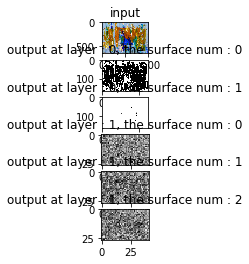

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def padding (img, dimx, dimy):
    dimx_zeros = dimx - img.shape[1]
    dimy_zeros = dimy - img.shape[0]
    dimx_left = int(dimx_zeros/2)
    dimx_right = dimx_zeros-dimx_left
    dimy_top = int(dimy_zeros/2)
    dimy_down = dimy_zeros-dimy_top

    img_out = np.zeros((dimy, dimx, img.shape[2]))
    img_out[dimy_top:dimy-dimy_down, dimx_left: dimx-dimx_right] = img

    return img_out



def corr2d (img, ker):
    return np.multiply(img, ker).sum()



def sigmoid(x):
    return 1/(1+np.exp(-x))

def nonlinear_func(img):
    return sigmoid(img)




def conv2d (input_img, ker, bias, nonlinear_func, stride=(1,1), pad='same'):
    img_out = []
    if pad =='same':
        dimy = stride[0]*(input_img.shape[0]-1)+ker.shape[0]
        dimx = stride[1]*(input_img.shape[1]-1)+ker.shape[1]
        img_padded = padding(input_img, dimx, dimy)
        img_out = np.zeros((input_img.shape[0], input_img.shape[1]))
    else:
        if((input_img.shape[0]-ker.shape[0])%stride[0]==0):
            dimy = input_img.shape[0]
        else:
            dimy = input_img.shape[0]+stride[0]-(input_img.shape[0]-ker.shape[0])%stride[0]
        if((input_img.shape[1]-ker.shape[1])%stride[1]==0):
            dimx = input_img.shape[1]
        else:
            dimx = input_img.shape[1]+stride[1]-(input_img.shape[1]-ker.shape[1])%stride[1]

        img_padded = padding(input_img, dimx, dimy)
        img_out = np.zeros((int((dimy-ker.shape[0])/stride[0])+1, (int((dimx-ker.shape[1])/stride[1])+1)))

    ker_rev = np.zeros([ker.shape[1], ker.shape[0], ker.shape[2]])

    for iter in range(ker.shape[0]):
        for iter2 in range(ker.shape[1]):
            ker_rev[ker.shape[1]-1-iter2, ker.shape[0]-1-iter] = ker[iter, iter2]

    ker_rev_y = ker_rev.shape[0]
    ker_rev_x = ker_rev.shape[1]
    for iter in range(int((dimy-ker_rev.shape[0])/stride[0]) +1):
        for iter2 in range(int((dimx-ker_rev.shape[1])/stride[1])+1 ):
            img_out[iter, iter2] =corr2d(img_padded[iter*stride[0]:iter*stride[0]+ker_rev_y, iter2*stride[1]:iter2*stride[1]+ker_rev_x], ker_rev)

    print("######################################################################")
    print("output size from the conv_layer : ", img_out.shape)
    print("ker size : ", ker.shape)
    print("stride : ", stride)
    print("pad : ", pad)
    return nonlinear_func(img_out+bias)




def conv_layer(input_img, num_kernels, nonlinear_func, kernels, biases, stride = (1, 1), pad = 'same'):
    if pad =='same':
        dimy = stride[0]*(input_img.shape[0]-1)+kernels[0].shape[0]
        dimx = stride[1]*(input_img.shape[1]-1)+kernels[0].shape[1]
        img_padded = padding(input_img, dimx, dimy)
        img_out = np.zeros((input_img.shape[0], input_img.shape[1], num_kernels))
    else:
        if((input_img.shape[0]-kernels[0].shape[0])%stride[0]==0):
            dimy = input_img.shape[0]
        else:
            dimy = input_img.shape[0]+stride[0]-(input_img.shape[0]-kernels[0].shape[0])%stride[0]
        if((input_img.shape[1]-kernels[0].shape[1])%stride[1]==0):
            dimx = input_img.shape[1]
        else:
            dimx = input_img.shape[1]+stride[1]-(input_img.shape[1]-kernels[0].shape[1])%stride[1]
        img_padded = padding(input_img, dimx, dimy)
        img_out = np.zeros((int((dimy-kernels[0].shape[0])/stride[0])+1, (int((dimx-kernels[0].shape[1])/stride[1])+1), num_kernels))

    for iter in range(num_kernels):
        img_out[:, :, iter] = conv2d(input_img, kernels[iter], biases[iter], nonlinear_func, stride, pad)
    return img_out



def pool_func(img):
    return img.min()



def pooling(input_img, pool_func, pool_window=(1,1), stride = (1,1)):
    if((input_img.shape[1]-pool_window[1])%stride[1]==0):
        dimx = input_img.shape[1]
    else:
        dimx = input_img.shape[1]+stride[1]-(input_img.shape[1]-pool_window[1])%stride[1]

    if((input_img.shape[0]-pool_window[0])%stride[0]==0):
        dimy = input_img.shape[0]
    else:
        dimy = input_img.shape[0]+stride[0]-(input_img.shape[0]-pool_window[0])%stride[0]
    input_pad = np.zeros((input_img.shape[0], input_img.shape[1], 1))
    input_pad[:, :, 0] = input_img
    input_img = padding(input_pad, dimx, dimy)
    img_out = np.zeros((int((dimy-pool_window[0])/stride[0])+1, (int((dimx-pool_window[1])/stride[1])+1)))

    pool_window_x = pool_window[1]
    pool_window_y = pool_window[0]

    for iter in range(int((dimy-pool_window_y)/stride[0]) +1):
        for iter2 in range(int((dimx-pool_window_x)/stride[1])+1 ):
	    #print(iter)
	    #print(iter2)
            img_out[iter, iter2] =pool_func(input_img[iter*stride[0]:iter*stride[0]+pool_window_y, iter2*stride[1]:iter2*stride[1]+pool_window_x])
#     print(img_out.shape)
    print("######################################################################")
    print("output size from the pool_layer : ", img_out.shape)
    print("pool_window size : ", pool_window)
    print("stride : ", stride)
    return img_out


def pool_layer(input_img, pool_func, pool_window=(1,1), stride = (1,1)):
    if((input_img.shape[1]-pool_window[1])%stride[1]==0):
        dimx = input_img.shape[1]
    else:
        dimx = input_img.shape[1]+stride[1]-(input_img.shape[1]-pool_window[1])%stride[1]

    if((input_img.shape[0]-pool_window[0])%stride[0]==0):
        dimy = input_img.shape[0]
    else:
        dimy = input_img.shape[0]+stride[0]-(input_img.shape[0]-pool_window[0])%stride[0]

    input_img = padding(input_img, dimx, dimy)

    img_out = np.zeros((int((dimy-pool_window[0])/stride[0])+1, (int((dimx-pool_window[1])/stride[1])+1), input_img.shape[2]))
    for iter in range(input_img.shape[2]):
#         print(input_img.shape)
        img_out[:, :, iter] = pooling(input_img[:, :, iter], pool_func, pool_window, stride)
    return img_out


def conv_net(input_img, num_layers, ker_nums, kernels, biases, strides, paddings, nonlinear_funcs, pool_funcs, pool_windows, pool_strides):
    img_out = input_img
    current_ker_count = 0
    images = []
    for iter in range(num_layers):
        img_out = conv_layer(img_out, ker_nums[iter], nonlinear_funcs[iter], kernels[current_ker_count:current_ker_count+ker_nums[iter]], biases[current_ker_count:current_ker_count+ker_nums[iter]], strides[iter], paddings[iter] )
        current_ker_count = current_ker_count + ker_nums[iter]
        print(img_out.shape)
        img_out = pool_layer(img_out, pool_funcs[iter], pool_windows[iter], pool_strides[iter])
        print(img_out.shape)
        images.append(img_out)
    return images

img = cv2.imread('image.png')
num_layers = 2

ker_nums_layer1 = 2
ker_nums_layer2 = 3
ker_nums = []

ker_nums.append(ker_nums_layer1)
ker_nums.append(ker_nums_layer2)

kernels = []

kl1n1 = np.random.normal(size = (4, 4, 3))
kl1n2 = np.random.normal(size = (4, 4, 3))
kl1n2[2, 2, :] = 1

kernels.append(kl1n1/kl1n1.sum())
kernels.append(kl1n2/kl1n2.sum())

kl2n1 = np.random.normal(size = (6, 6, 2))
kl2n2 = np.ones((6, 6, 2))
kl2n3 = np.random.normal( size = (6, 6, 2))

kernels.append(kl2n1/kl2n1.sum())
kernels.append(kl2n2/kl2n2.sum())
kernels.append(kl2n3/kl2n3.sum())

kernels = np.array(kernels)

# print(kernels[3].shape)

stridel1 = (2, 2)
stridel2 = (3, 3)

strides = []
strides.append(stridel1)
strides.append(stridel2)

# print(strides)

paddingl1 = 'valid'
paddingl2 = 'valid'

paddings = []
paddings.append(paddingl1)
paddings.append(paddingl2)

# print(paddings)

nonlinear_funcl1 = nonlinear_func
nonlinear_funcl2 = nonlinear_func

nonlinear_funcs = []
nonlinear_funcs.append(nonlinear_funcl1)
nonlinear_funcs.append(nonlinear_funcl2)

# print(nonlinear_funcs)

pool_funcl1 = pool_func
pool_funcl2 = pool_func

pool_funcs = []
pool_funcs.append(pool_funcl1)
pool_funcs.append(pool_funcl2)

# print(pool_funcs)

pool_windowl1 = (3, 3)
pool_windowl2 = (2, 2)

pool_windows = []
pool_windows.append(pool_windowl1)
pool_windows.append(pool_windowl2)

# print(pool_windows)

pool_stridel1 = (2, 2)
pool_stridel2 = (2, 2)

pool_strides = []
pool_strides.append(pool_stridel1)
pool_strides.append(pool_stridel2)

# print(pool_strides)

biases = []

################################################################################
shapey = 0
shapex = 0

for ker1 in kernels[0:ker_nums_layer1]:

    shapey = 331
    shapex = 499
    bias = np.random.normal(size=(shapey, shapex))
#     print(ker1.shape)
    biases.append(bias)

for ker1 in kernels[ker_nums_layer1:ker_nums_layer2+ker_nums_layer1]:
    shapey = 54
    shapex = 82

    bias = np.random.normal(size=(shapey, shapex))
    print(ker1.shape)
    biases.append(bias)

for iter in range(np.array(biases).shape[0]):
    print(biases[iter].shape)
################################################################################

img_out3 = conv_net(img, num_layers, ker_nums, kernels, biases, strides, paddings, nonlinear_funcs, pool_funcs, pool_windows, pool_strides)

count = 1
for iter in range(np.array(img_out3).shape[0]):
    for iter2 in range(img_out3[iter].shape[2]):
        count+=1

plt.subplot(count, 1, 1)
plt.imshow(img)
plt.title("input")
current_count = 1
for iter in range(np.array(img_out3).shape[0]):
    for iter2 in range(img_out3[iter].shape[2]):
        current_count+=1
        plt.subplot(count, 1, current_count)
        plt.imshow(img_out3[iter][:, :, iter2], cmap = 'gray')
        plt.title("output at layer : "+str(iter)+", the surface num : "+str(iter2))
plt.show()
